 # Pytorch Workflow

 Let´s explore a an example PyTorch end-to-end workflow

 Resources:
* Ground Truth notebook
* Book version of notebook
* Ask a question

In [77]:
what_were_covering = {1:"data (prepare and load)",
                      2:"build model",
                      3:"fiting the model to data (training)",
                      4:"making predictions and evaluationg a model (inference)",
                      5:"saving and loading a model",
                      6:"putting it all together"
                      }
what_were_covering                      

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fiting the model to data (training)',
 4: 'making predictions and evaluationg a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [78]:
import torch
import matplotlib.pyplot as plt
from torch import nn # nn contains all of PyTorch´s building blocks for neuroal networks

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

## Data: Preparing and loading

Data can be almost anything... in machine learning.
* Excel soeadsheet
* Images of any kind
* Videos (Youtube has a lot of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.


To showase this, let´s create some *known* data using the linear regression formula
We´ll use a linear regression formula to make a straight line with known parameters.

In [79]:
# Create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [80]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [81]:
len(X), len(y)

(50, 50)

### Splitting data into training and tests sets (one of the most important concepts in machine leaerning in general)

Let´s create a training and test set with our data

In [82]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y [train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is the data explorer´s mottom comes in!
"Visualize,Visualize,Visualize!"

In [83]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b',s=4, label='Training data')
  # Plot test data in green
  plt.scatter(train_data, train_labels, c='g', s=4, label='Testing data')

  # Are there predictions
  if predictions is not None:
    #Plot the predictions
    plt.scatter(test_data,predictions,c='r',s=6,label='Predictions')

  # Show the legends
  plt.legend(prop={'size':14})

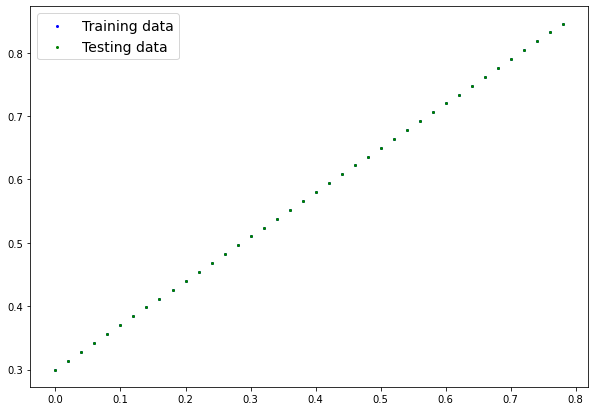

In [84]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building our first PyTorch Model

Our first PyTorch Model


What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get
closer to) the ideal values (the weight & bias values we used to create the data)


How does it do so?
Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [155]:
# Create a linear regression model class
from torch import nn
class LinearRegression(nn.Module): # Almost everything in PyTorch inherits from nn.Module

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # It is true by default
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

# Forward method to define computation in the model
  def forward(self, x: torch.Tensor)->torch.Tensor: # "x" is the imput data
    return self.weights * x + self.bias # this is the linear regression formula

## PyTorch model building essentials

* torch.nn - contains al of the buildings for computational graphs (a neuronal network can be considerad a computational graph)
* torch.nn.Parameter - what parameters should our model try an learn, ofteb a Pytorch layer from torch.nn will set these for us 
* torch.nn.Module - The base class for all neuronal networks modules. if you subclass it, you must overwritte forward.
*torch.optim - this where the optimizer in PyTorch live, they vill help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwritte forward(), this method defines what happens in the forward computation.

### Checking the contentes of our PyTorch model

Now we´ve created our model, let´s see what´s inside...
So we can check our model parameters or what´s inside our model using .parameters()

In [170]:
# Crate a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
# Create an instance of the modle (this is a subset of nn.Module)
model_0 = LinearRegression()

# Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [171]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using 'torch.inference_mode()'
To check our model's predictive power, let´s see how well it predicts y_test based on X_test

When we pass data throug our model, it´s goingo to run it through the 'forward()' method

In [172]:
# One way of make predictions 
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [173]:
# Make prediction with model. This way turn of gradient requires_grad --> with a large dataset predictions will be a lot faster because it´s not tracking the gradient.
# Nice to use when we make inferences and we not train.
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

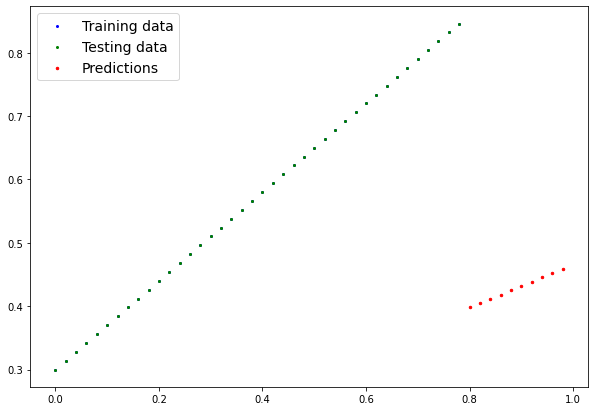

In [174]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameter (these maybe random) to some *known* parameter.

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong our model prediction are is to use a loss function.

* Note: Loss function may also be called cost function or critirerion in diferente ares. For our case, weáregoing to refer to it as a loss funciton

* **Loss Function:** A function to measure how wrong your model´s prediction are to the ideal output. So lower is better. 

* **Optimizer:** Takes into account the loss of a model and adjusts the model´s parameter (e.g. weight and bias in our case to improve the loss function) 

And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [175]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [176]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [177]:
# Setup a loss function
loss_func = nn.L1Loss()
# Setup an Optimizer Stochastic gradient descent in this case.
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01,
                            ) # Learning rate

In [178]:
loss_func, optimizer

(L1Loss(), SGD (
 Parameter Group 0
     dampening: 0
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Building a training loop (and a testint loop) in PyTorch

A couple of things we need in a training loop:
0. Loop throung the data
1. Forward pass (this involves data moving through our model´s 'forward()' function to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters or our model with respect the loss. (**backpropagation**)
5. Optimizer step - use the optimizer to adjust ouyr mmodel´s parameters to try and improve the loss. (**gradient descent**)

In [179]:
# An epochs is one loop through the data ... this is a hyperparameter because we´ve set it ourself
# Tracking experiments
epochs_count = []
train_loss_values = []
test_loss_values = []
epochs = 200
torch.manual_seed(42)
### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
  #model_0.eval()  turn of gradient tracking.
  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2 Calculate the loss
  train_loss = loss_func(y_pred,y_train)
  # 3. Zero the optimizer gradietns (they acumulate every epoch,zero them to start fresg each forward pass)
  optimizer.zero_grad()
  # 4. Perfom backpropagtaion on the loss with respect to the parameters of the model
  train_loss.backward()
  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate throug the loop. so we have to zero them in step3 for the nex iteration of the loop-

  # Testing
  model_0.eval() # turns off diferentes settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turn off gradient tracking & a couple more things behind scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_func(test_pred,y_test)
  if epoch % 10==0:
    epochs_count.append(torch.tensor(epoch).numpy())
    train_loss_values.append(torch.tensor(train_loss).numpy())
    test_loss_values.append(torch.tensor(test_loss).numpy())
    print(f'Epoch: {epoch} | Train loss: {train_loss} | Test loss: {test_loss}- model: {model_0.state_dict()}')

  

    


Epoch: 0 | Train loss: 0.31288138031959534 | Test loss: 0.48106518387794495- model: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Train loss: 0.1976713240146637 | Test loss: 0.3463551998138428- model: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Train loss: 0.08908725529909134 | Test loss: 0.21729660034179688- model: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Train loss: 0.053148526698350906 | Test loss: 0.14464017748832703- model: OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Train loss: 0.04543796554207802 | Test loss: 0.11360953003168106- model: OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Train loss: 0.04167863354086876 | Test loss: 0.09919948130846024- model: OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Train loss: 0.03818932920694351 | Test los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


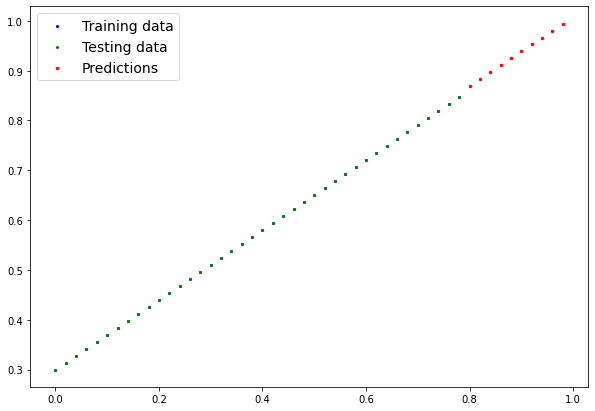

In [187]:
plot_predictions(predictions=test_pred)


Text(0.5, 0, 'Epochs')

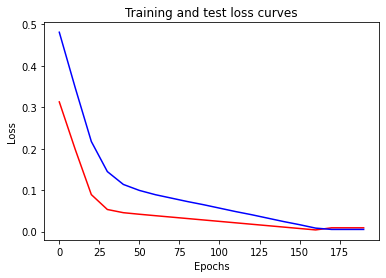

In [186]:
import numpy as np
# Plot the loss curves
plt.plot(epochs_count, train_loss_values, label='Train loss', c = 'r')
plt.plot(epochs_count, test_loss_values, label='Test loss', c = 'b')
plt.title("Training and test loss curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')



## Saving a model in PyTorch

There are three main methdos you should know about for saving and loading models in PyTorch
1. 'torch.save()' - allows you to save PyTorch model in a python picke format.
2. 'torch.load()' - allows you to load a saved PyTorch object
3. 'torch.nn.Module.load_state_dict()' - this allow to load a model´s saved state dictionary

In [192]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [195]:
# Saving our PyTroch model
from pathlib import Path
# Create a model path
MODEL_PATH = Path('/content/drive/MyDrive/models')
MODEL_PATH.mkdir(parents=True, exist_ok = True)
# 2. Create a model 
MODEL_NAME = "01_pythorc_workflow_model_0.pth" # pth for convention
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

## Loading a PyTorch model

Sinced we saver our model as a 'state_dict' rather than the entire model, w´ll create a new instance of our model and load the saved state_dict() into that

In [203]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [206]:
# Create a new instance of our model
loaded_model_0 = LinearRegression()
# Load state dict into the already created model, from the model in drive.
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
# Show loaded model state dict  
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [209]:
# Make sompre predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [210]:
# Let´s compare previous predictions with our loaded model
loaded_model_preds == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let´s go back through the steps above and see it all in one place

In [212]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
# Check PyTorch version
torch.__version__

'1.12.1+cu113'

Create a device-agnostic code

This means if we´ve got a ccesos to a GPU, ourcode will use it (for pontentially faster computing)
if no GPU is available, the code will defalt to using CPU

In [214]:
# Setun device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


## 6.1 Data



In [245]:
# Create some data using the linear regression formula of y =  weight * x + bias 
weight = 0.8
bias = 0.15

# Create a range values
start = 0
end = 1
step = 0.02
# Create x and y features

X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = X * weight + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.1500],
         [0.1660],
         [0.1820],
         [0.1980],
         [0.2140],
         [0.2300],
         [0.2460],
         [0.2620],
         [0.2780],
         [0.2940]]))

In [246]:
len(y)

50

In [247]:
# Split data
train_split = int(0.75 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)


(37, 37, 13, 13)

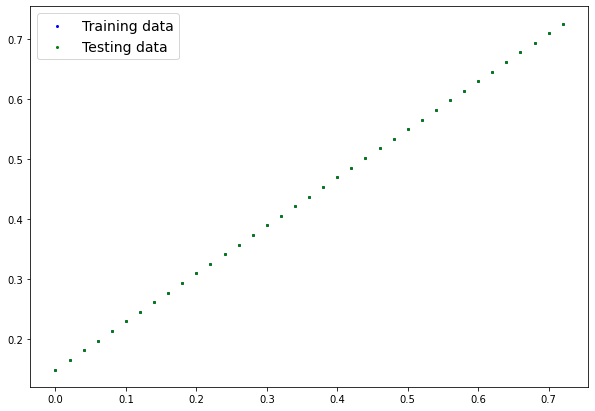

In [248]:
# Plot the data

plot_predictions(X_train,y_train,X_test,y_test)

## 6.2 Building a PyTorch Linear Model

In [249]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters also called: linear transform, denselayer in tensorflow, fully connected layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1
                                )
  def forward(self, x: torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [250]:
# Check the model device
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [251]:
# Loss function
loss_func = nn.L1Loss()
optimizer = torch.optim.Adam(lr=0.01, params = model_1.parameters())

In [254]:
# Set the model to use the target device
model_1.to(device)
# Set the seed
torch.manual_seed(42)
# Set quantity of epochs
epochs = 200
# Utilities to see model information
epochs_list = []
test_loss_values = []
train_loss_values = []
# train
for epoch in range(epochs):
  model_1.train()
  # 1. Forward pass
  y_predict = model_1(X_train)
  # 2. Calculate the loss
  loss_train = loss_func(y_predict,y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Perfom backpropagation
  loss_train.backward()
  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_preds = model_1(X_test)

    test_loss = loss_func(test_preds,y_test)

    # Print out what´s happening
    if epoch % 10 == 0:
      print(f'Epoch: {epoch} - loss: {loss_train} - test_loss: {test_loss}')



Epoch: 0 - loss: 0.6672418117523193 - test_loss: 0.6309109926223755
Epoch: 10 - loss: 0.5312418937683105 - test_loss: 0.4449112117290497
Epoch: 20 - loss: 0.39524203538894653 - test_loss: 0.2589114010334015
Epoch: 30 - loss: 0.25924214720726013 - test_loss: 0.07291155308485031
Epoch: 40 - loss: 0.12776727974414825 - test_loss: 0.11219140142202377
Epoch: 50 - loss: 0.0935571938753128 - test_loss: 0.24076005816459656
Epoch: 60 - loss: 0.09271997958421707 - test_loss: 0.2658866345882416
Epoch: 70 - loss: 0.08303428441286087 - test_loss: 0.2279035896062851
Epoch: 80 - loss: 0.07190841436386108 - test_loss: 0.1743823140859604
Epoch: 90 - loss: 0.06313015520572662 - test_loss: 0.13730141520500183
Epoch: 100 - loss: 0.053625013679265976 - test_loss: 0.11818370223045349
Epoch: 110 - loss: 0.04354455694556236 - test_loss: 0.10332608968019485
Epoch: 120 - loss: 0.03323756530880928 - test_loss: 0.07875335961580276
Epoch: 130 - loss: 0.02258150652050972 - test_loss: 0.05080632120370865
Epoch: 140 

In [258]:
weight, bias, model_1.state_dict()

(0.8,
 0.15,
 OrderedDict([('linear_layer.weight', tensor([[0.8006]])),
              ('linear_layer.bias', tensor([0.1494]))]))

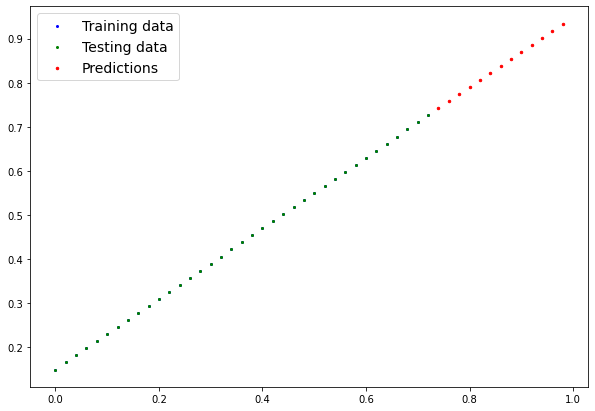

In [256]:
plot_predictions(X_train,y_train,X_test,y_test,test_preds)

### 6.4 Making and evaluating predictions and plot them

In [270]:
# Turn the model in evaluation mod
model_1.eval()
# Make predictions on the teste data

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.7418],
        [0.7578],
        [0.7738],
        [0.7899],
        [0.8059],
        [0.8219],
        [0.8379],
        [0.8539],
        [0.8699],
        [0.8859],
        [0.9020],
        [0.9180],
        [0.9340]])

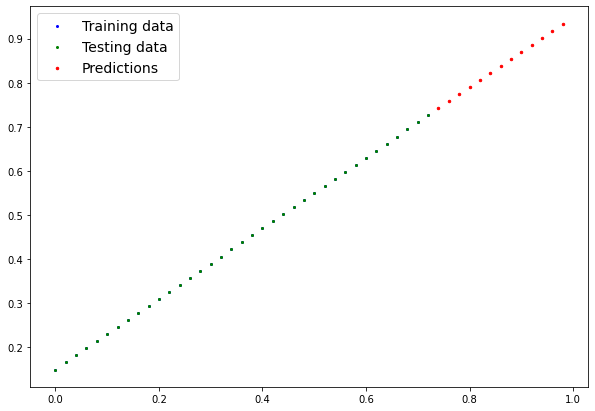

In [271]:
# Check out our model predictions visually
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

### 6.5 Saving & Loading the model

In [272]:
torch.save(model_1.state_dict(),"/content/drive/MyDrive/models/02_pytorch_workflow_pth" )

In [273]:
mode_01_loaded = LinearRegressionModelV2()
mode_01_loaded.load_state_dict(torch.load("/content/drive/MyDrive/models/02_pytorch_workflow_pth"))

<All keys matched successfully>

In [275]:
loaded_predictions = mode_01_loaded(X_test)

In [276]:
y_preds == loaded_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [278]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8006]])),
             ('linear_layer.bias', tensor([0.1494]))])